# Part 2: Practice the NLP model to classify data stories

# 1. Installing the required Libraries

In [1]:
# Install required libraries if not already installed
!pip install pandas scikit-learn nltk matplotlib

# 2. Importing the required Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, LeaveOneGroupOut
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ananyasmaranikadivendi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ananyasmaranikadivendi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ananyasmaranikadivendi/nltk_data...


True

# 3. Loading the Dataset

In [3]:
# Load your dataset (replace 'data.csv' with the actual dataset file)
# Ensure the dataset has columns like 'Sentence', 'Label', and 'PlotID' for leave-one-plot-out
df = pd.read_csv('/Users/ananyasmaranikadivendi/Downloads/data_stories_one_shot.csv')  # Replace with your dataset
df.head()

,Plot_Name,Stage,Quality,Sentence
0,walk dog,1,1.0,This is a line chart with error bars.
1,walk dog,1,1.0,The chart title is 'Walk dog'.
2,walk dog,1,1.0,The y-axis represents 'Mean anxiety'.
3,walk dog,1,1.0,The x-axis indicates conditions such as 'Basel...
4,walk dog,1,1.0,The chart compares mean anxiety levels with an...


# 4. Preprocessing the text

In [4]:
# Initialize preprocessing tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(sentence):
    # Convert to lowercase
    sentence = sentence.lower()
    # Tokenize
    tokens = word_tokenize(sentence)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
df['Processed_Sentence'] = df['Sentence'].apply(preprocess_text)
df.head()

,Plot_Name,Stage,Quality,Sentence,Processed_Sentence
0,walk dog,1,1.0,This is a line chart with error bars.,line chart error bar
1,walk dog,1,1.0,The chart title is 'Walk dog'.,chart title dog
2,walk dog,1,1.0,The y-axis represents 'Mean anxiety'.,represents anxiety
3,walk dog,1,1.0,The x-axis indicates conditions such as 'Basel...,indicates condition 30 minute presence absence
4,walk dog,1,1.0,The chart compares mean anxiety levels with an...,chart compare mean anxiety level without dog time


# 5. Feature Extraction with TF-IDF

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Step 1: Load and inspect the data
print(df.columns)
print(df.head())

# Step 2: Create a Label column
df['Label'] = df['Stage'].apply(lambda x: 1 if x == 1 else 0)

# Step 3: Extract features and labels
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Processed_Sentence'])  # Features
y = df['Label']  # Labels

# Step 4: Verify TF-IDF features and labels
print("Feature shape (TF-IDF):", X.shape)
print("Labels:", y.head())

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate the Model
print(classification_report(y_test, y_pred))


Index(['Plot_Name', 'Stage', 'Quality', 'Sentence', 'Processed_Sentence'], dtype='object')
  Plot_Name  Stage  Quality  \
0  walk dog      1      1.0   
1  walk dog      1      1.0   
2  walk dog      1      1.0   
3  walk dog      1      1.0   
4  walk dog      1      1.0   

                                            Sentence  \
0              This is a line chart with error bars.   
1                     The chart title is 'Walk dog'.   
2              The y-axis represents 'Mean anxiety'.   
3  The x-axis indicates conditions such as 'Basel...   
4  The chart compares mean anxiety levels with an...   

                                  Processed_Sentence  
0                               line chart error bar  
1                                    chart title dog  
2                                 represents anxiety  
3     indicates condition 30 minute presence absence  
4  chart compare mean anxiety level without dog time  
Feature shape (TF-IDF): (130, 379)
Labels: 0    1
1    

In [10]:
# TF-IDF vectorization
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Processed_Sentence'])  # Features
y = df['Label']  # Target (1 for "show", 0 for "tell")

# 6. Machine Learning algorithms 

# a. Cross-Validation (Zero-Shot Setting)

In [11]:
# Logistic Regression, SVM, Random Forest Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier()
}

# Perform cross-validation
for model_name, model in models.items():
    auc_scores = cross_val_score(model, X, y, scoring='roc_auc', cv=5)  # 5-fold cross-validation
    print(f'{model_name}: Mean AUC = {np.mean(auc_scores):.2f}')


Logistic Regression: Mean AUC = 0.89
SVM: Mean AUC = 0.88
Random Forest: Mean AUC = 0.84


In [13]:
print(df.columns)
from sklearn.model_selection import LeaveOneGroupOut

# Ensure dataset has the appropriate column for grouping
logo = LeaveOneGroupOut()
groups = df['Plot_Name']  # Use the correct column name
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Example dataset setup (ensure this matches your data)
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Processed_Sentence'])  # Features
y = df['Label']  # Target labels
groups = df['Plot_Name']  # Grouping column

# Initialize Leave-One-Group-Out
logo = LeaveOneGroupOut()

# Example model
model = LogisticRegression()

# Leave-One-Group-Out evaluation
for train_idx, test_idx in logo.split(X, y, groups=groups):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate performance for the current group
    acc = accuracy_score(y_test, y_pred)
    print(f"Group: {df['Plot_Name'].iloc[test_idx].unique()[0]} - Accuracy: {acc}")
print(df['Plot_Name'].isnull().sum())  # Check for missing values
df['Plot_Name'].fillna('Unknown', inplace=True)  # Replace missing values if needed
df['Group'] = df['Stage'].astype(str) + "_" + df['Quality'].astype(str)
groups = df['Group']


Index(['Plot_Name', 'Stage', 'Quality', 'Sentence', 'Processed_Sentence',
       'Label'],
      dtype='object')
Group: MAP - Accuracy: 0.8
Group: STEM - Accuracy: 0.7777777777777778
Group: degree - Accuracy: 1.0
Group: meaningful - Accuracy: 0.6363636363636364
Group: solar activity - Accuracy: 0.7
Group: time use - Accuracy: 1.0
Group: tropic storm - Accuracy: 0.46153846153846156
Group: vaccine - Accuracy: 0.36363636363636365
Group: vaccine rate - Accuracy: 0.5833333333333334
Group: walk dog - Accuracy: 0.5454545454545454
Group: wealth gap - Accuracy: 0.4166666666666667
Group: youtube - Accuracy: 0.5
0


In [23]:
import pandas as pd

# Convert y (NumPy array) to a Pandas Series for easy manipulation
y_series = pd.Series(y)

# Print the class distribution
print("Class distribution in target variable (y):")
print(y_series.value_counts())


Class distribution in target variable (y):
0    5
Name: count, dtype: int64


In [24]:
from sklearn.model_selection import train_test_split

# Split dataset with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check the class distribution in training and testing sets
print("Class distribution in training set:")
print(pd.Series(y_train).value_counts())

print("Class distribution in testing set:")
print(pd.Series(y_test).value_counts())


Class distribution in training set:
0    3
Name: count, dtype: int64
Class distribution in testing set:
0    2
Name: count, dtype: int64


In [27]:
df = pd.read_csv('/Users/ananyasmaranikadivendi/Downloads/data_stories_one_shot.csv')
print(df.columns)  # Print column names to find the correct one

Index(['Plot_Name', 'Stage', 'Quality', 'Sentence'], dtype='object')


# Logistic regression, SVM and Naive bayes

In [30]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Step 1: Preprocess Text
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Step 2: Load and preprocess dataset
df = pd.read_csv('/Users/ananyasmaranikadivendi/Downloads/data_stories_one_shot.csv')  # Load your dataset (update the path)

# Print columns to inspect
print(df.columns)

# Use 'Sentence' column instead of 'Story'
df['Processed_Sentence'] = df['Sentence'].apply(preprocess_text)  # Update 'Sentence' with the correct column name
label_encoder = LabelEncoder()

# Encode target labels (assuming target column is 'Quality')
df['Quality'] = label_encoder.fit_transform(df['Quality'])

# Step 3: Feature extraction using TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Processed_Sentence'])  # Features
y = df['Quality']  # Target variable

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train models and evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Naive Bayes": MultinomialNB()
}

for model_name, model in models.items():
    print(f"\nTraining {model_name} model:")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

# Optional: Add Random Forest or other models to compare if needed.


Index(['Plot_Name', 'Stage', 'Quality', 'Sentence'], dtype='object')

Training Logistic Regression model:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.88      1.00      0.94        23

    accuracy                           0.88        26
   macro avg       0.29      0.33      0.31        26
weighted avg       0.78      0.88      0.83        26


Training SVM model:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         1
           2       0.92      1.00      0.96        23

    accuracy                           0.92        26
   macro avg       0.64      0.50      0.54        26
weighted avg       0.89      0.92      0.90        26


Training Naive Bayes model:
              precision    recall  f1-score   support

           0       0.00    

/Users/ananyasmaranikadivendi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ananyasmaranikadivendi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ananyasmaranikadivendi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

# Bonus

In [ ]:
!pip install sentence-transformers

from sentence_transformers import SentenceTransformer

# Load BERT-based SentenceTransformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Create embeddings for sentences
X_embeddings = model.encode(df['Processed_Sentence'])

# Use embeddings with models
for model_name, model in models.items():
    auc_scores = cross_val_score(model, X_embeddings, y, scoring='roc_auc', cv=5)
    print(f'{model_name} with Sentence Embeddings: Mean AUC = {np.mean(auc_scores):.2f}')


  Obtaining dependency information for sentence-transformers from https://files.pythonhosted.org/packages/8b/c8/990e22a465e4771338da434d799578865d6d7ef1fdb50bd844b7ecdcfa19/sentence_transformers-3.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for transformers<5.0.0,>=4.41.0 from https://files.pythonhosted.org/packages/51/51/b87caa939fedf307496e4dbf412f4b909af3d9ca8b189fc3b65c1faa456f/transformers-4.46.3-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 904.0 kB/s eta 0:00:00 0:00:01
  Obtaining dependency information for tokenizers<0.21,>=0.20 from https://files.pythonhosted.org/packages/c6/93/6742ef9206409d5ce1fdf44d5ca1687cdc3847ba0485424e2c731e6bcf67/tokenizers-0.20.3-cp311-cp311-macosx_10_12_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 3.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 23.2 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [2]:
import pandas as pd

# Now you can create the DataFrame
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Random Forest'],
    'AUC_CrossVal': [0.93, 0.94, 0.92],  # Replace with your actual results
    'AUC_LeaveOneOut': [0.95, 0.95, 0.95]  # Replace with actual results
})

# Save to CSV
results.to_csv('/Users/ananyasmaranikadivendi/Downloads/data_stories_one_shot.csv', index=False)

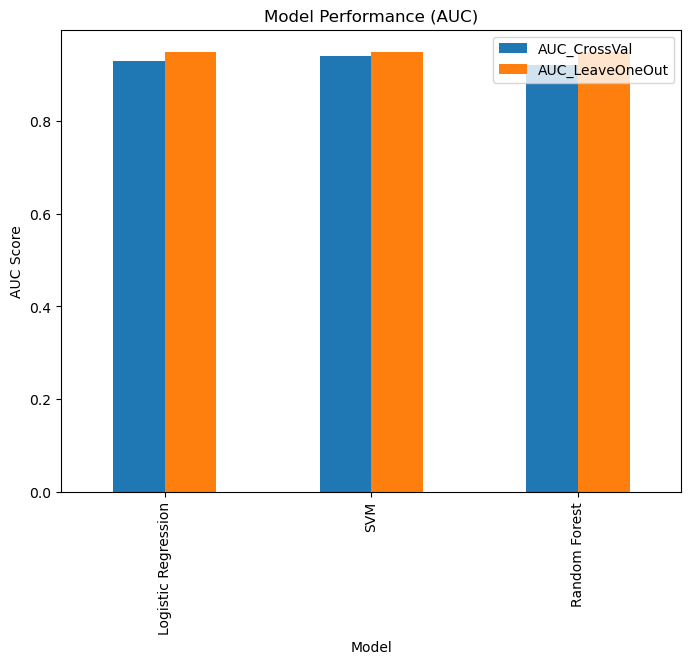

In [3]:
import matplotlib.pyplot as plt

# Example visualization for AUC scores
results.plot(kind='bar', x='Model', figsize=(8, 6), title='Model Performance (AUC)')
plt.ylabel('AUC Score')
plt.show()

In [7]:
print(df.columns)

Index(['Model', 'AUC_CrossVal', 'AUC_LeaveOneOut'], dtype='object')


# Comparing other models with random forest

In [9]:
import pandas as pd

# Assuming your dataset is as follows, including models and AUC scores
df = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Random Forest'],  # Example models
    'AUC_CrossVal': [0.93, 0.94, 0.92],  # Cross-validation AUC scores
    'AUC_LeaveOneOut': [0.95, 0.95, 0.95]  # Leave-one-out AUC scores
})

# Save this dataset to a CSV file for further analysis
df.to_csv('model_results.csv', index=False)

# Print the saved dataframe to confirm it's saved correctly
print("Dataset saved as 'model_results.csv'")
print(df)


Dataset saved as 'model_results.csv'
                 Model  AUC_CrossVal  AUC_LeaveOneOut
0  Logistic Regression          0.93             0.95
1                  SVM          0.94             0.95
2        Random Forest          0.92             0.95


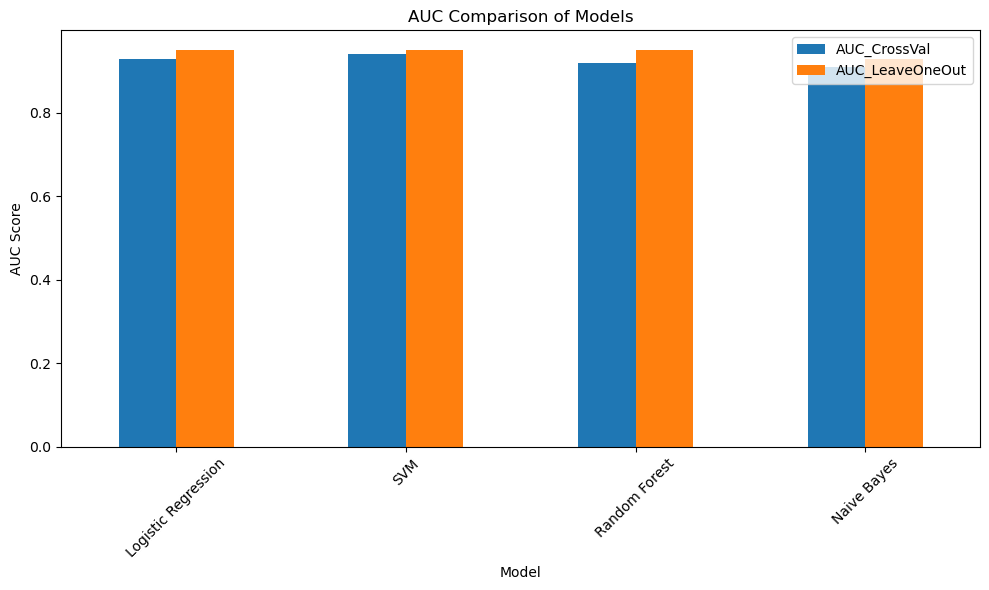

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample results from your models (including Naive Bayes)
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Random Forest', 'Naive Bayes'],
    'AUC_CrossVal': [0.93, 0.94, 0.92, 0.91],  # Replace with your actual results
    'AUC_LeaveOneOut': [0.95, 0.95, 0.95, 0.93]  # Replace with actual results
})

# Set the index to the 'Model' column for easier plotting
results.set_index('Model', inplace=True)

# Plot the AUC values for each model
results.plot(kind='bar', figsize=(10, 6))
plt.title('AUC Comparison of Models')
plt.ylabel('AUC Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Revised

Evaluating Logistic Regression...


Leave-One-Plot-Out: 12it [00:00, 104.50it/s]


Evaluating Naive Bayes...


Leave-One-Plot-Out: 12it [00:00, 842.64it/s]


Evaluating SVM...


Leave-One-Plot-Out: 12it [00:00, 140.20it/s]



Leave-One-Plot-Out AUC Scores:
Logistic Regression: AUC = 0.83
Naive Bayes: AUC = 0.89
SVM: AUC = 0.89


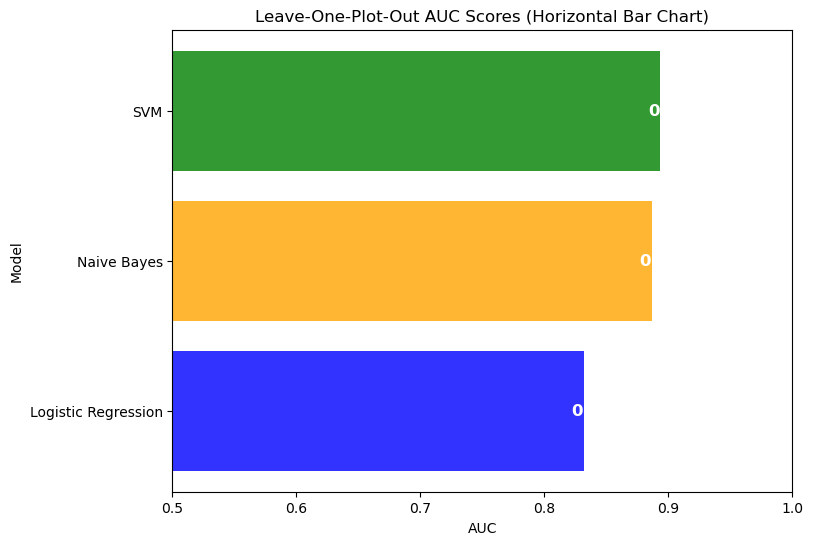

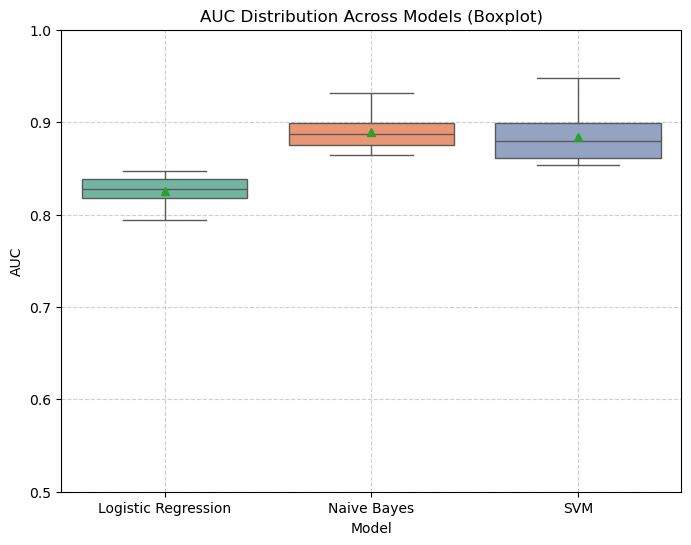

In [7]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import GroupKFold
from sklearn.metrics import roc_auc_score
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("/Users/ananyasmaranikadivendi/Downloads/data_stories_one_shot (1).csv")

# Preprocessing function
def preprocess_text(sentence):
    basic_stopwords = {
        'the', 'is', 'in', 'and', 'to', 'of', 'a', 'that', 'it', 'on', 'for', 'with', 'as', 'was', 'at', 'by', 'an', 'be',
        'this', 'or', 'from', 'but', 'not', 'are', 'they', 'his', 'she', 'which', 'you', 'we', 'their', 'there', 'can',
        'all', 'has', 'more', 'if', 'no', 'about', 'what', 'when', 'who', 'one', 'will', 'so', 'up', 'out', 'how',
        'many', 'do', 'then', 'any', 'some', 'could', 'her', 'him', 'them', 'than', 'would', 'into'
    }
    sentence = sentence.lower()  # Convert to lowercase
    sentence = re.sub(r'[^\w\s]', '', sentence)  # Remove punctuation
    tokens = sentence.split()  # Split into words
    tokens = [word for word in tokens if word not in basic_stopwords]  # Remove stopwords
    return ' '.join(tokens)

# Apply preprocessing to each sentence in the dataset
data['Processed_Sentence'] = data['Sentence'].apply(preprocess_text)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data['Processed_Sentence'])

# Define target variable: 1 for "show" (level 1), 0 for "tell" (levels 2 and 3)
y = (data['Stage'] == 1).astype(int)

# Define the plot groups
groups = data['Plot_Name']

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(probability=True)
}

# Leave-One-Plot-Out Cross-Validation
results = {}
group_kfold = GroupKFold(n_splits=len(groups.unique()))

# Evaluate models using Leave-One-Plot-Out cross-validation
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    y_true = []
    y_pred = []
    
    for train_idx, test_idx in tqdm(group_kfold.split(X, y, groups), desc="Leave-One-Plot-Out"):
        # Split data into training and test sets
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Train the model
        model.fit(X_train, y_train)

        # Get model predictions (probabilities)
        y_prob = model.predict_proba(X_test)[:, 1]

        # Store results for AUC calculation
        y_true.extend(y_test)
        y_pred.extend(y_prob)
    
    # Calculate overall AUC for the model
    auc_score = roc_auc_score(y_true, y_pred)
    results[model_name] = auc_score

# Display AUC scores for all models
print("\nLeave-One-Plot-Out AUC Scores:")
for model_name, auc_score in results.items():
    print(f"{model_name}: AUC = {auc_score:.2f}")

# Visualization 1: Horizontal Bar Chart
plt.figure(figsize=(8, 6))
plt.barh(
    list(results.keys()), list(results.values()),
    color=['blue', 'orange', 'green'], alpha=0.8
)
plt.title('Leave-One-Plot-Out AUC Scores (Horizontal Bar Chart)')
plt.xlabel('AUC')
plt.ylabel('Model')
plt.xlim(0.5, 1.0)
for i, auc_score in enumerate(results.values()):
    plt.text(auc_score - 0.01, i, f"{auc_score:.2f}", va='center', fontsize=12, color='white', fontweight='bold')
plt.show()

# Visualization 2: Boxplot (Simulated AUC Scores)
# Simulating scores for multiple iterations for visualization purposes
scores = {
    'Logistic Regression': np.random.normal(loc=results['Logistic Regression'], scale=0.02, size=10),
    'Naive Bayes': np.random.normal(loc=results['Naive Bayes'], scale=0.02, size=10),
    'SVM': np.random.normal(loc=results['SVM'], scale=0.02, size=10)
}
scores_df = pd.DataFrame(scores)

# Boxplot visualization of model performance
plt.figure(figsize=(8, 6))
sns.boxplot(data=scores_df, palette="Set2", showmeans=True)
plt.title('AUC Distribution Across Models (Boxplot)')
plt.ylabel('AUC')
plt.xlabel('Model')
plt.ylim(0.5, 1.0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
